In [1]:
import warnings
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')

# Analiza rozkładu majątków miliarderów w różnych krajach, branżach i regionach

## Kraje

**Wykres pokazuje kraje z największą liczbą miliarderów. Jak możemy zauważyc na samym szczycie znajdują się USA, Chiny i Indie**

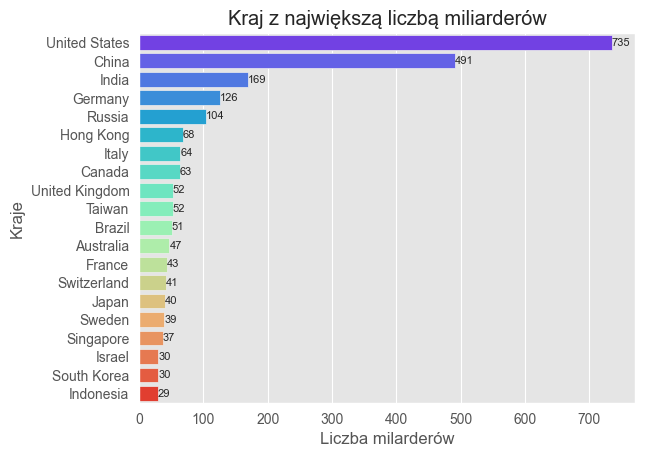

In [29]:
ppl_in_countries = df.groupby('countryOfCitizenship')['rank'].count().reset_index().sort_values(by ='rank',ascending=False).head(20)
ax = sns.barplot(ppl_in_countries,x='rank',y='countryOfCitizenship',orient='h',hue = 'countryOfCitizenship', legend = False, palette='rainbow')
ax.set_title('Kraj z największą liczbą miliarderów')
ax.set_ylabel('Kraje')
ax.set_xlabel('Liczba milarderów')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.show()

**Wykres obrazujący liczbę miliarderów biorąc pod uwage liczbe mieszkańców danego kraju**

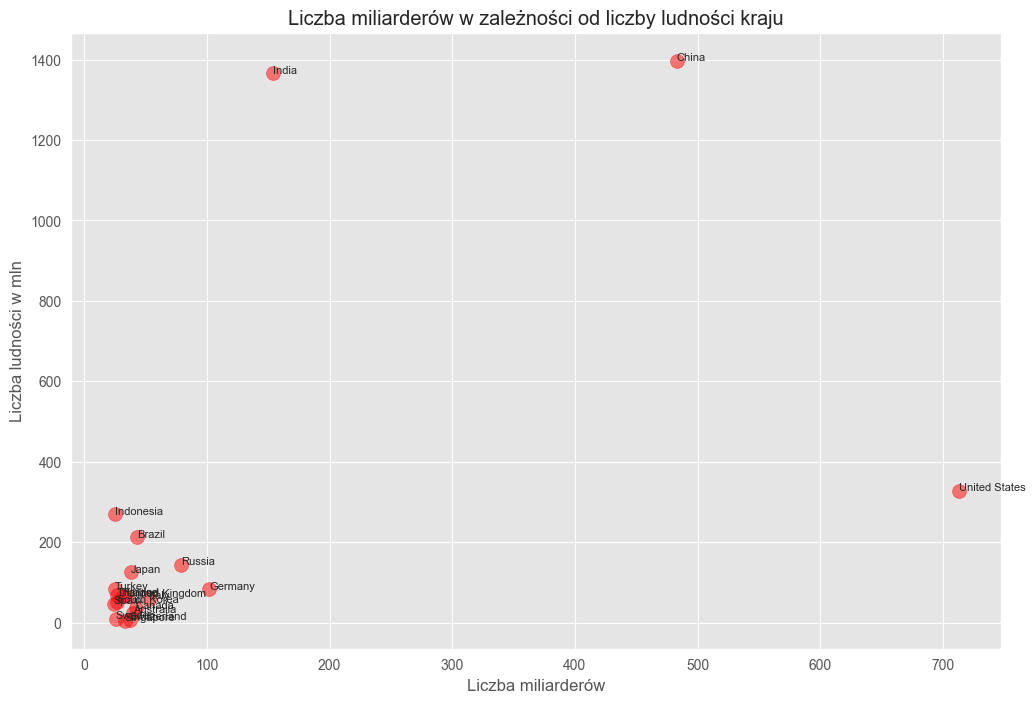

In [30]:
ppl_in_countries = df.groupby(['countryOfCitizenship', 'population_country'])['rank'].count().reset_index().sort_values(by ='rank',ascending=False).head(20)
ppl_in_countries['population_country'] = ppl_in_countries['population_country'] / 1000000
ppl_in_countries['population_country'] = ppl_in_countries['population_country'].astype(int)

plt.figure(figsize=(12, 8))
plt.scatter(ppl_in_countries['rank'], ppl_in_countries['population_country'], s=100, c='red', alpha=0.5)

for i, txt in enumerate(ppl_in_countries['countryOfCitizenship']):
    plt.annotate(txt, (ppl_in_countries['rank'].iloc[i], ppl_in_countries['population_country'].iloc[i]), fontsize=8)

plt.title('Liczba miliarderów w zależności od liczby ludności kraju')
plt.xlabel('Liczba miliarderów')
plt.ylabel('Liczba ludności w mln')
plt.show()

**Ten sam wykres bez Chin, Indii oraz USA, dla lepszego zobrazowania innych krajów**

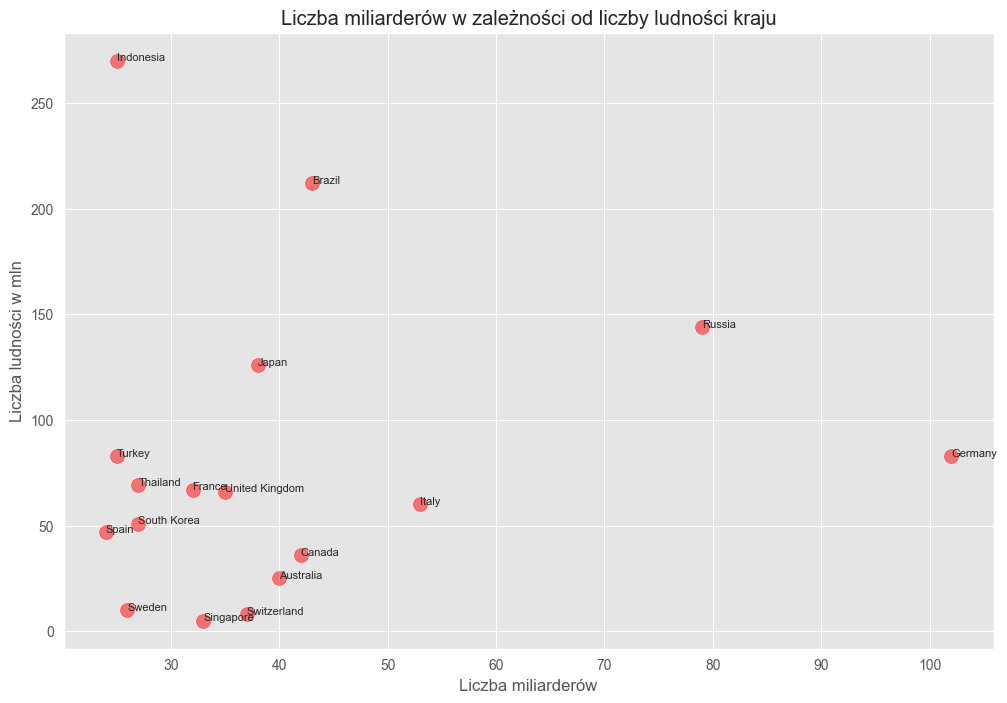

In [31]:
ppl_in_countries = ppl_in_countries[3:]
plt.figure(figsize=(12, 8))
plt.scatter(ppl_in_countries['rank'], ppl_in_countries['population_country'], s=100, c='red', alpha=0.5)

for i, txt in enumerate(ppl_in_countries['countryOfCitizenship']):
    plt.annotate(txt, (ppl_in_countries['rank'].iloc[i], ppl_in_countries['population_country'].iloc[i]), fontsize=8)

plt.title('Liczba miliarderów w zależności od liczby ludności kraju')
plt.xlabel('Liczba miliarderów')
plt.ylabel('Liczba ludności w mln')
plt.show()

## Branże

**Wykres kołowy pokazujący ile procentowo milliarderów uzyskało swoje bogactwo z jakiej branży. Widać na niej że topowe dziedziny to: finanse, manufaktura i technologia**

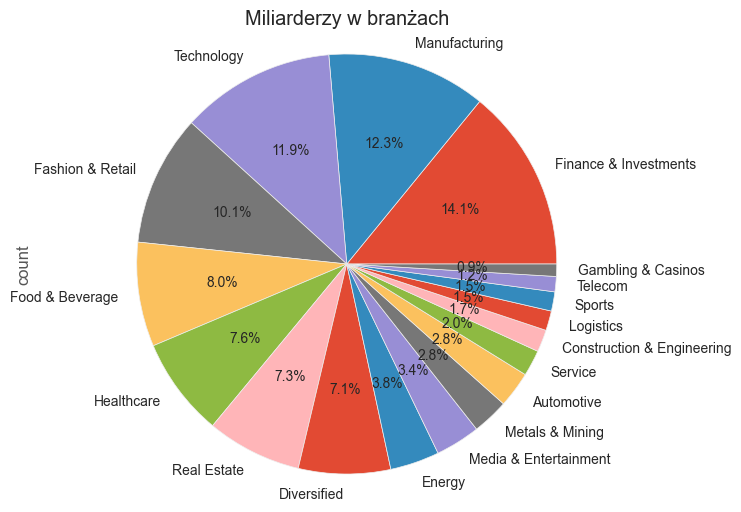

In [32]:
plt.figure(figsize=(8, 6))
df['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Miliarderzy w branżach')
plt.axis('equal')
plt.show()

**Wykres słupkowy pokazujący dokładną liczbę milliarderów na daną branże**

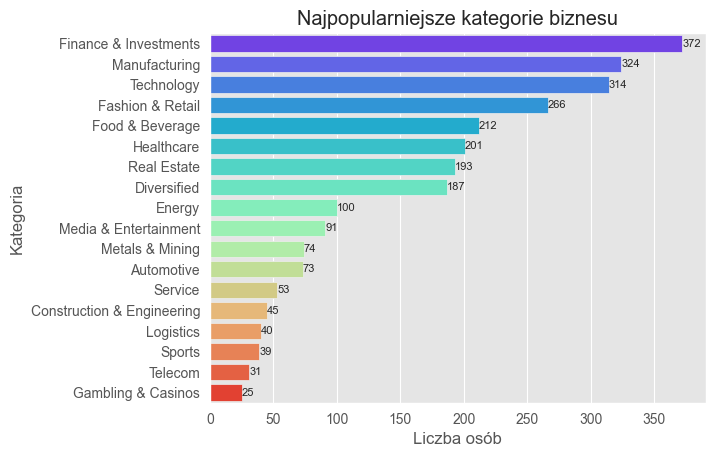

In [33]:
categories = df.groupby('category')['rank'].count().sort_values(ascending=False).reset_index().head(20)
ax = sns.barplot(categories,x='rank',y='category',orient='h',hue = 'category', legend = False, palette='rainbow')
ax.set_title('Najpopularniejsze kategorie biznesu')
ax.set_ylabel('Kategoria')
ax.set_xlabel('Liczba osób')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.show()

**Wykres pokazuje wiek oraz branże miliarderów, jest bez dwóch wartośći odstających by lepiej go zobrazować: Bernard Arnault - 211mld, Elon Musk- 180mld.**

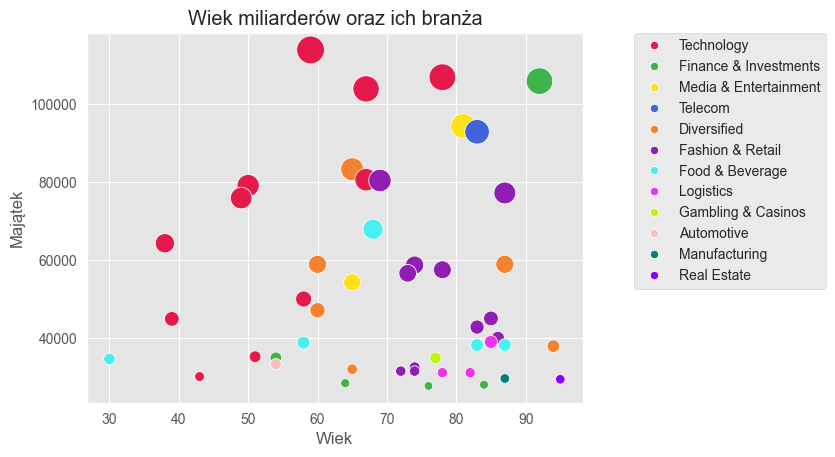

In [34]:
top_20 = df.sort_values('finalWorth', ascending=False).iloc[2:50]
color_palette = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#8b00ff']
ax = sns.scatterplot(top_20,x='age', y='finalWorth', size='finalWorth', hue='category', palette=color_palette, sizes=(40, 400), legend='full')
ax.set_title('Wiek miliarderów oraz ich branża')
ax.set_ylabel('Majątek')
ax.set_xlabel('Wiek')
hand, labl  = ax.get_legend_handles_labels()
unique_values_set = set(df['category'])
handout=[]
lablout=[]
for h,l in zip(hand,labl):
    if l in unique_values_set:
        lablout.append(l)
        handout.append(h)
ax.legend(handout, lablout,bbox_to_anchor=(1.49, 1), loc='upper right', borderaxespad=0)
plt.show()

## Regiony

**Przedstawienie z której częsci USA wywodzą się miliarderzy. Milarder zamieszkujący U.S. Territories to Stephen Deckoff, zamieszkuje on Wyspsy Dziewicze**

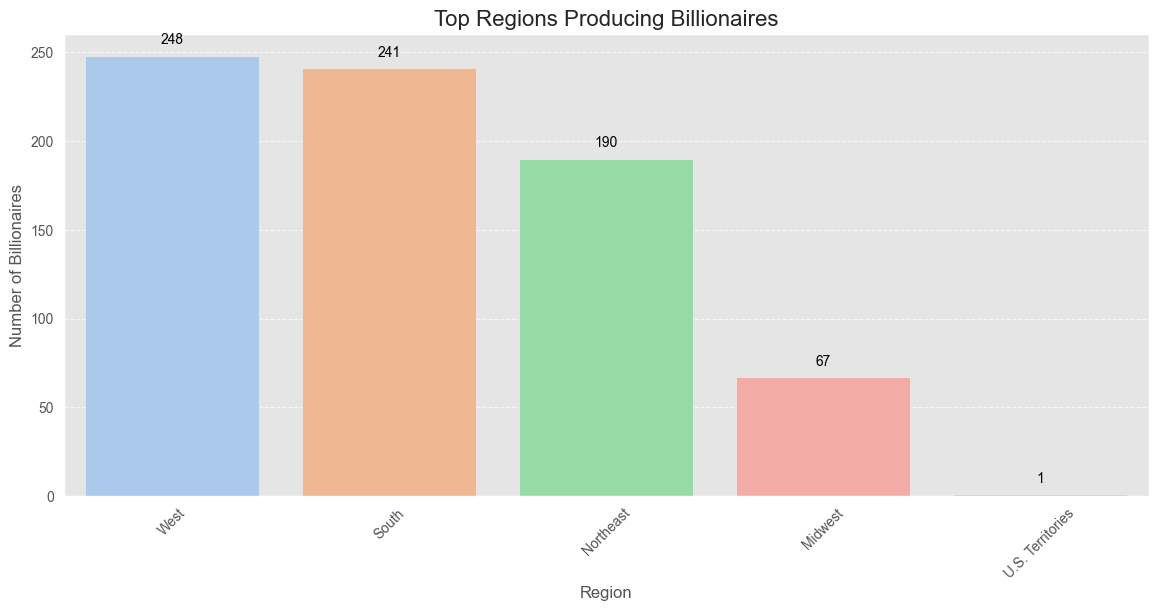

In [35]:
region_counts = df['residenceStateRegion'].value_counts()
top_regions = region_counts.head(10)

colors = sns.color_palette("pastel")

plt.figure(figsize=(14, 6))
sns.barplot(x=top_regions.index, y=top_regions, palette=colors)
plt.title('Top Regions Producing Billionaires', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(top_regions):
    plt.text(i, v + 5, str(v), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

# Analiza demograficzna: Przedstawienie wieku, płeci i miejsca urodzenia miliarderów.

## Wiek

**Wykres pokazujący ile miliarderów jest w danym wieku**

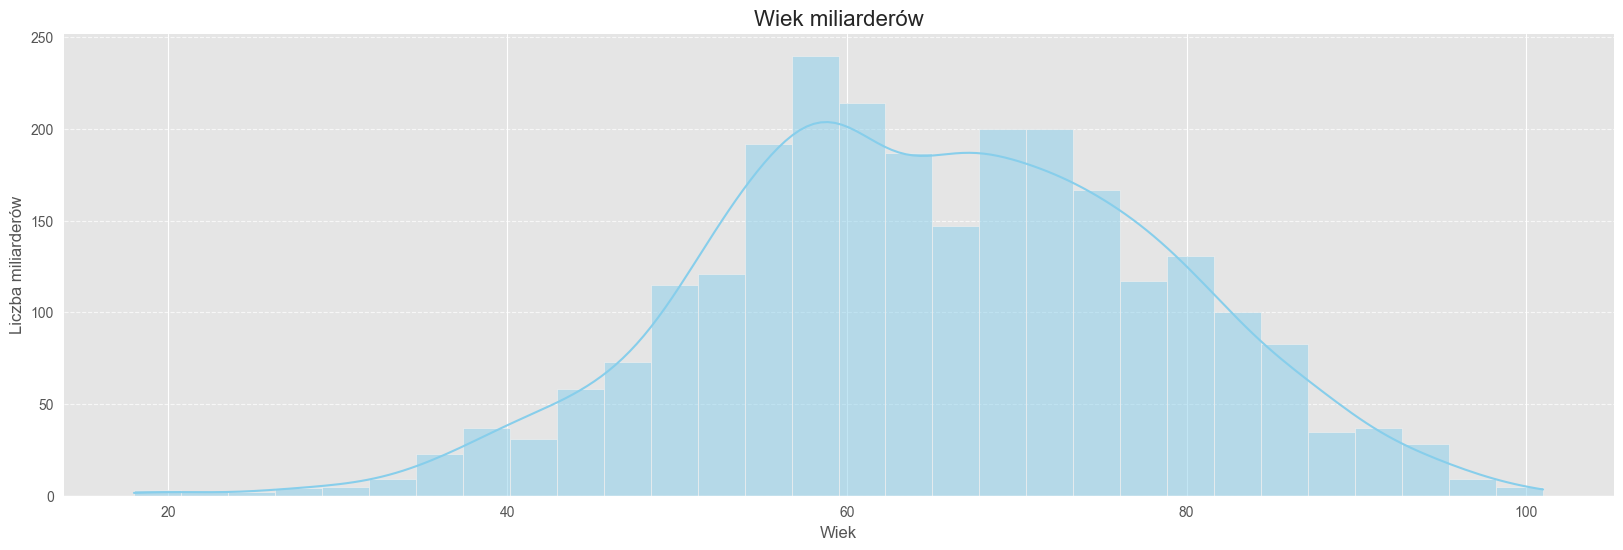

In [36]:
plt.figure(figsize=(20, 6))
sns.histplot(data=df[df['age'].notnull()], x='age', bins=30, color='skyblue', kde=True)
plt.title('Wiek miliarderów', fontsize=16)
plt.xlabel('Wiek', fontsize=12)
plt.ylabel('Liczba miliarderów', fontsize=12)

sns.set_style("whitegrid")
sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Pokazanie średniego wieku miliarderów w danym kraju i zestawienie ich ze średnią długościa życia w danym kraju.**

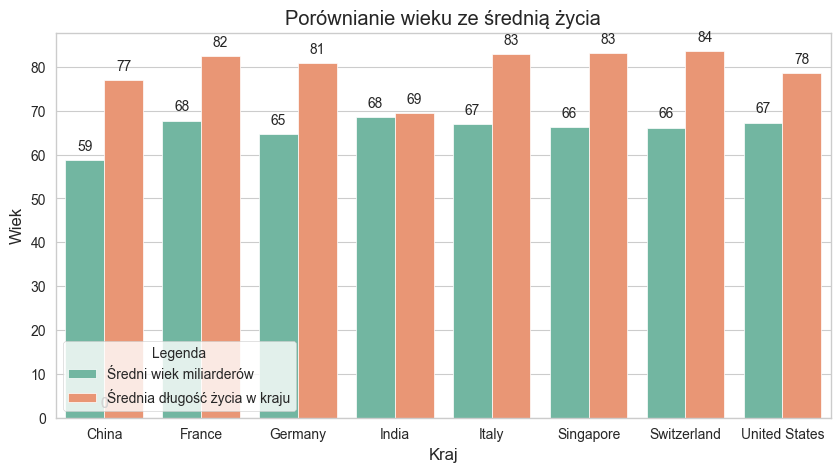

In [37]:
d= df[['country','age', 'life_expectancy_country']]
avg_age = d.groupby('country')[['age','life_expectancy_country']].mean().reset_index()
avg_age.columns = ['Country', 'Średni wiek miliarderów', 'Średnia długość życia w kraju']
countries = ['United States', 'India','China', 'France','United Kingdom'
            'Russia', 'Italy','Switzerland','Singapore','Germany']
top_countries_age = avg_age.loc[avg_age['Country'].isin(countries)]
top_countries_age.fillna(85.39)

df_long = pd.melt(top_countries_age, id_vars='Country', var_name='Variable', value_name='Value')

plt.figure(figsize=(10,5))
c_plot = sns.barplot(x='Country', y='Value', hue='Variable', data=df_long, palette='Set2')

plt.title('Porównianie wieku ze średnią życia')
plt.xlabel('Kraj')
plt.ylabel('Wiek')
plt.legend(title='Legenda', loc='lower left')
    
for p in c_plot.patches:
    c_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Miejsce urodzenia

**Wykres pokazujący w jakim mieście urodziło się najwięcej miliarderów**

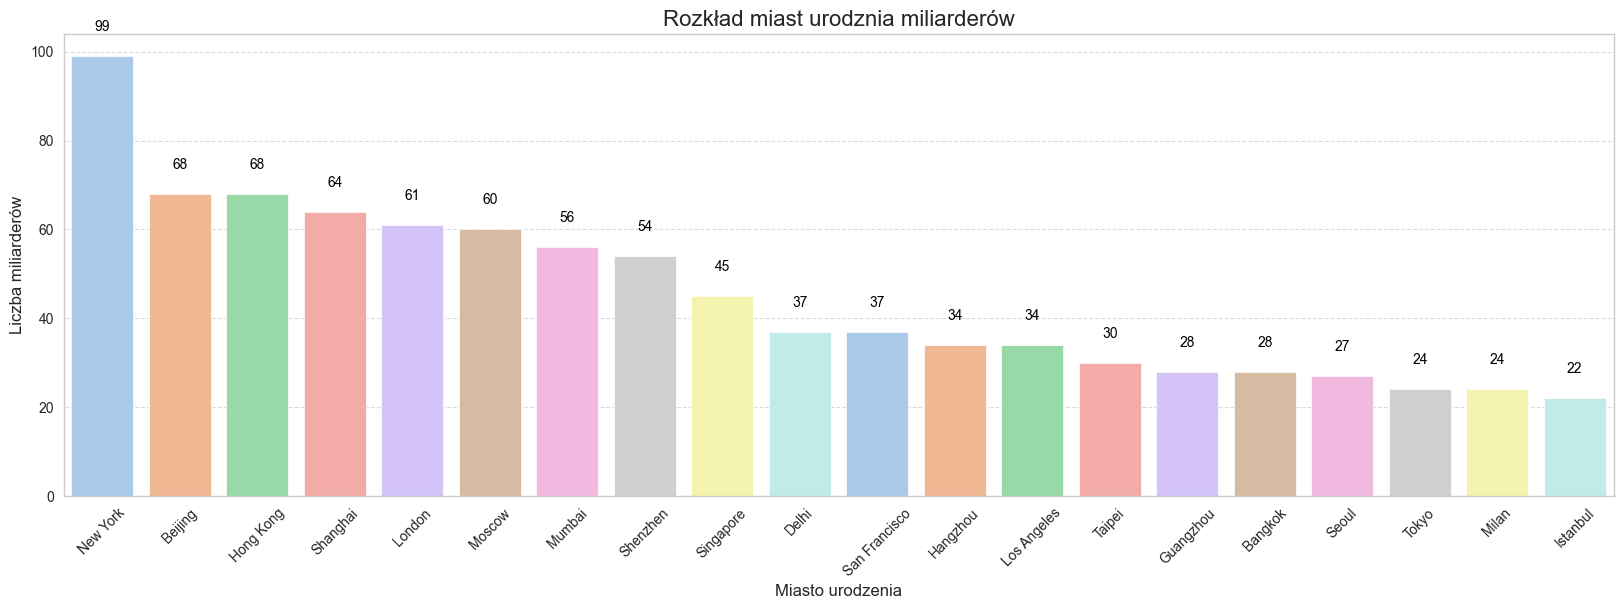

In [38]:
top_birth_cities = df['city'].value_counts().head(20)

plt.figure(figsize=(20, 6))
sns.barplot(x=top_birth_cities.index, y=top_birth_cities, palette=colors)
plt.title('Rozkład miast urodznia miliarderów', fontsize=16)
plt.xlabel('Miasto urodzenia', fontsize=12)
plt.ylabel('Liczba miliarderów', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(top_birth_cities):
    plt.text(i, v + 5, str(v), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

**Pokazanie miesięcy i dni w których urodzili się miliarderzy.**

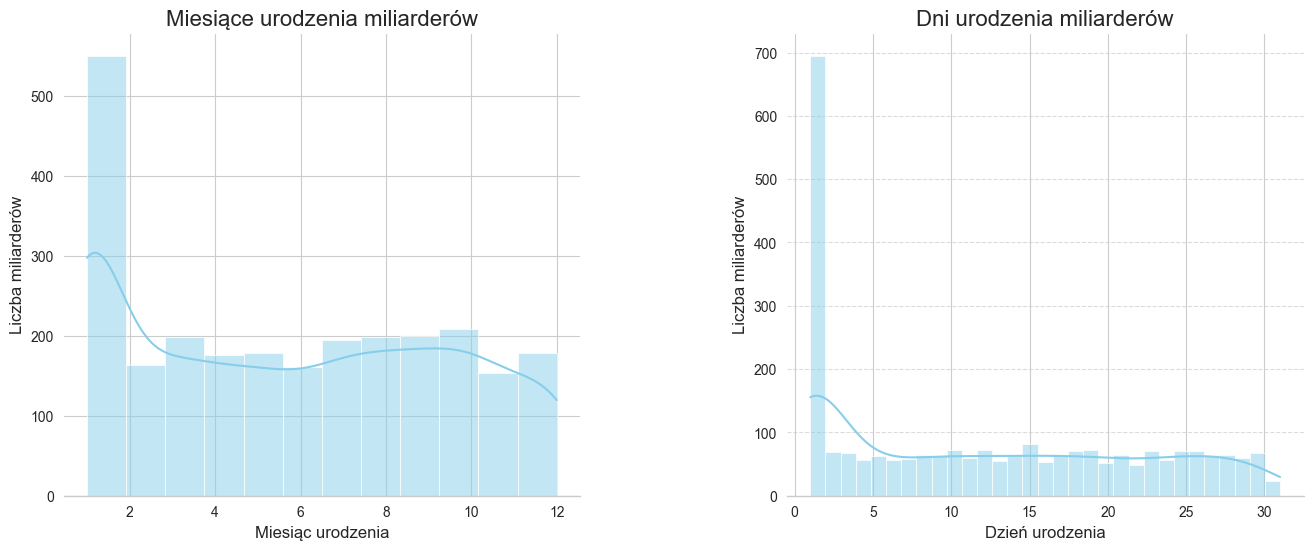

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.set_title('Miesiące urodzenia miliarderów', fontsize=16)
sns.histplot(data=df['birthMonth'], bins=12, color='skyblue', kde=True, ax=ax1)
ax1.set_xlabel('Miesiąc urodzenia', fontsize=12)
ax1.set_ylabel('Liczba miliarderów', fontsize=12)

ax2.set_title('Dni urodzenia miliarderów', fontsize=16)
sns.histplot(data=df['birthDay'], bins=31, color='skyblue', kde=True, ax=ax2)
ax2.set_xlabel('Dzień urodzenia', fontsize=12)
ax2.set_ylabel('Liczba miliarderów', fontsize=12)

sns.set_style("whitegrid")
sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(wspace=0.4)
plt.show()

## Płeć

**Wykres kołowy przedstawiający procentowy rozkład płci wsród miliarderów.**

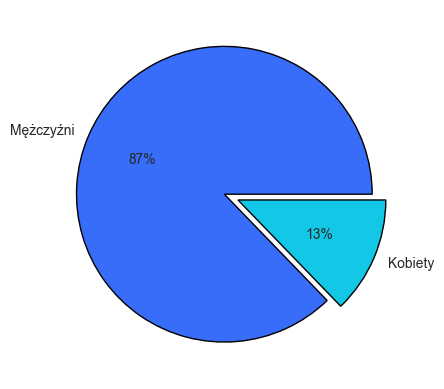

In [40]:
d = df['gender']
d =d.map({'M': 'Mężczyźni', 'F': 'Kobiety'})
val = d.value_counts().values 
keys = d.value_counts().index
colors = sns.color_palette('rainbow')
ax = plt.pie(val, labels=keys, autopct='%.0f%%', explode = [0, 0.1], colors = colors,
            wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, }) 
plt.show() 

# Najbardziej majętne osoby

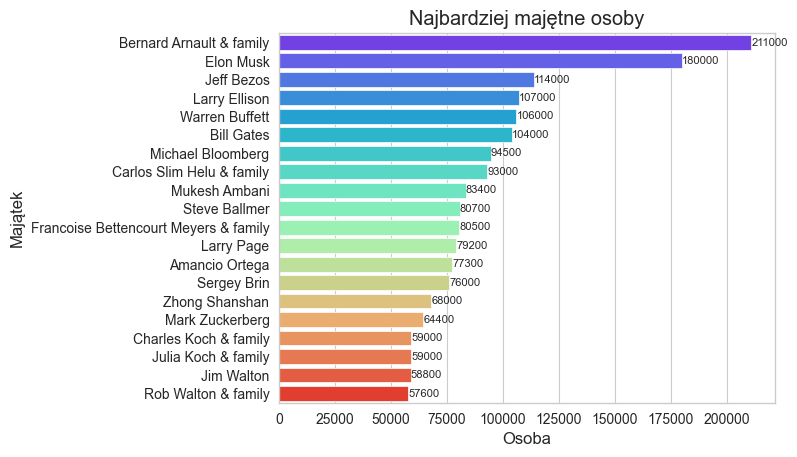

In [41]:
ax = sns.barplot(df.head(20), x='finalWorth',y='personName', hue = 'personName', legend = False,orient='h', palette='rainbow')
ax.set_title('Najbardziej majętne osoby')
ax.set_xlabel('Osoba')
ax.set_ylabel('Majątek')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.show()

# Najpopularniejsze imiona wśród miliarderów

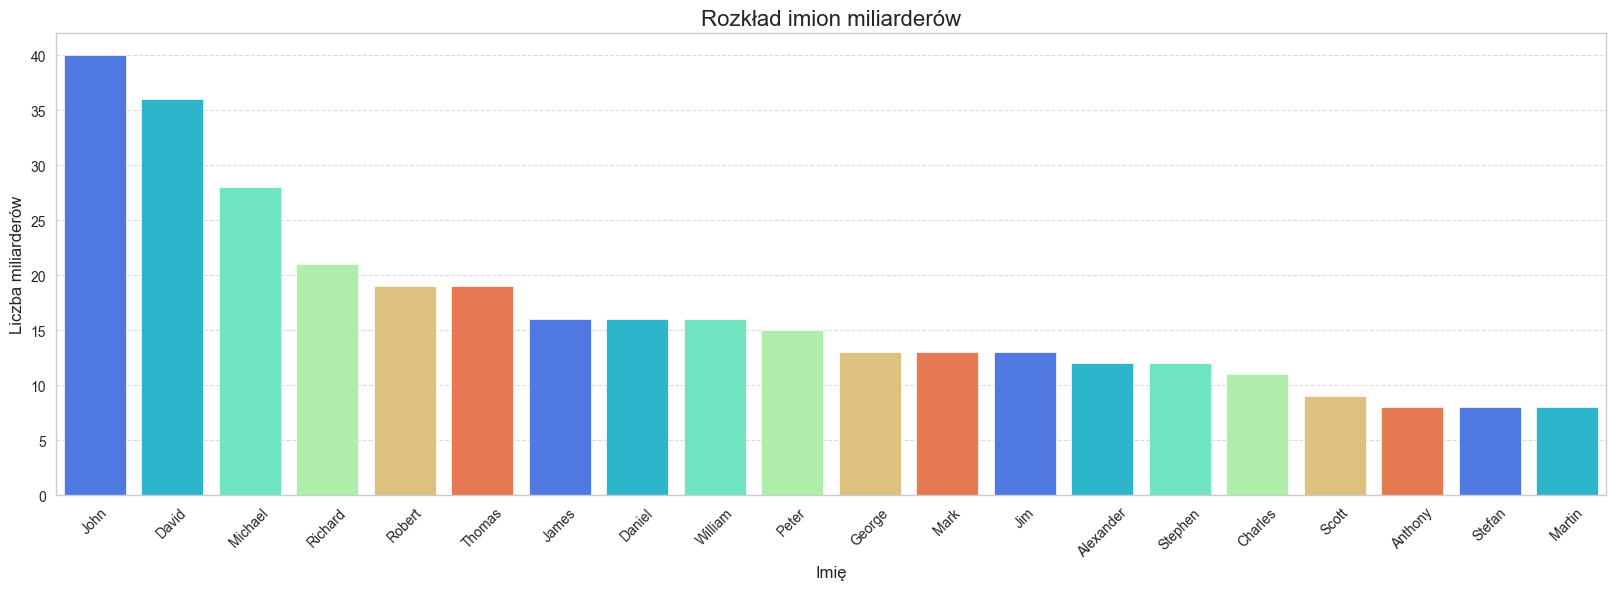

In [42]:
names = df['firstName'].value_counts().head(20)

# plot this

plt.figure(figsize=(20, 6))
sns.barplot(x=names.index, y=names, palette=colors)
plt.title('Rozkład imion miliarderów', fontsize=16)
plt.xlabel('Imię', fontsize=12)
plt.ylabel('Liczba miliarderów', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Wykres pokazuję czy miliarder dorobił się sam czy odziedziczył fortune

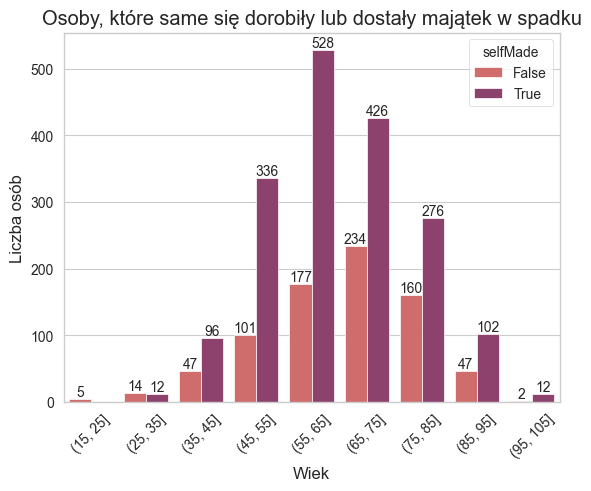

In [43]:
self_made_by_age = df[['age','selfMade']]
bins = [15,  25,  35,  45,  55,  65,  75,  85,  95, 105]
self_made_by_age['age'] = pd.cut(self_made_by_age['age'], bins = bins)
ax = sns.countplot(self_made_by_age, x = self_made_by_age['age'], hue = self_made_by_age['selfMade'], palette= 'flare' )
ax.tick_params(axis='x', rotation=45)
ax.set_title('Osoby, które same się dorobiły lub dostały majątek w spadku')
ax.set_ylabel('Liczba osób')
ax.set_xlabel('Wiek')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

# Pokazanie ile miliarderów ma jaki majątek

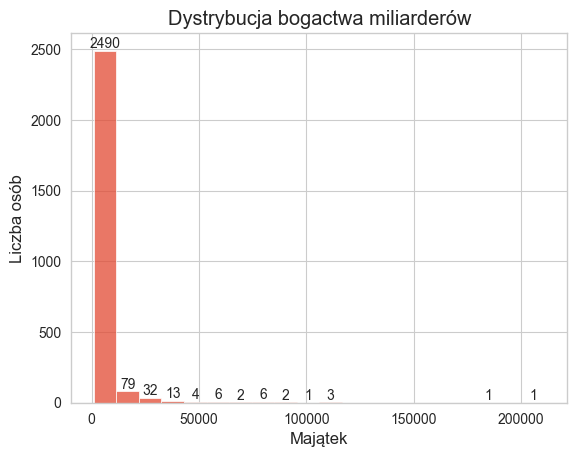

In [44]:
ax = sns.histplot(df,x='finalWorth',bins = 20)
ax.set_title('Dystrybucja bogactwa miliarderów')
ax.set_xlabel('Majątek')
ax.set_ylabel('Liczba osób')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.show()

# Zależnośc pomiędzy PKB a liczbą miliarderów

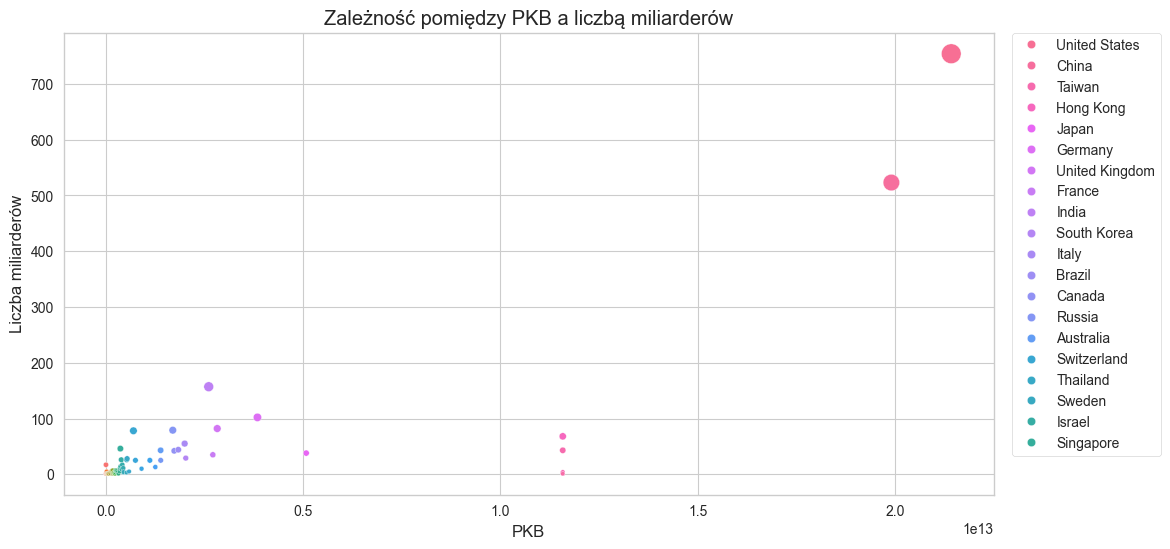

In [45]:
plt.figure(figsize=(12, 6))
df2 = df[['gdp_country','rank','country']].copy()
df2['gdp_country'] = df2['gdp_country'].astype(str).str.replace('[\$,]', '', regex=True)
df2['gdp_country'] = pd.to_numeric(df2['gdp_country'], errors='coerce')
df2['gdp_country'].fillna(df2['gdp_country'].mean(), inplace=True)

billionaires_based_on_gdp = df2.groupby(['gdp_country','country'])['rank'].count().reset_index()

color= sns.color_palette('rainbow')
ax = sns.scatterplot(billionaires_based_on_gdp, x='gdp_country', y='rank', size='rank',sizes = (10,200), hue = 'country')
ax.set_title('Zależność pomiędzy PKB a liczbą miliarderów')
ax.set_xlabel('PKB')
ax.set_ylabel('Liczba miliarderów')

hand, labl  = ax.get_legend_handles_labels()
sorted_billionaires = billionaires_based_on_gdp.sort_values(by='rank', ascending=False).head(20)
unique_values_set = set(sorted_billionaires['country'])
handout=[]
lablout=[]
for h,l in zip(hand,labl):
    if l in unique_values_set:
        lablout.append(l)
        handout.append(h)
ax.legend(handout[::-1], lablout[::-1],bbox_to_anchor=(1.18, 1), loc='upper right', borderaxespad=0)


# for i in range(billionaires_based_on_gdp.shape[0]):

#     ax.text(x=billionaires_based_on_gdp['gdp_country'][i]+0.3,y=billionaires_based_on_gdp['rank'][i]+0.3,s=billionaires_based_on_gdp['country'][i], 
#              fontdict=dict(color='black',size=10))

plt.show()

# Najmłodsi miliarderzy

**Mark Mateschitz odziedziczył 49% firmy RedBull**

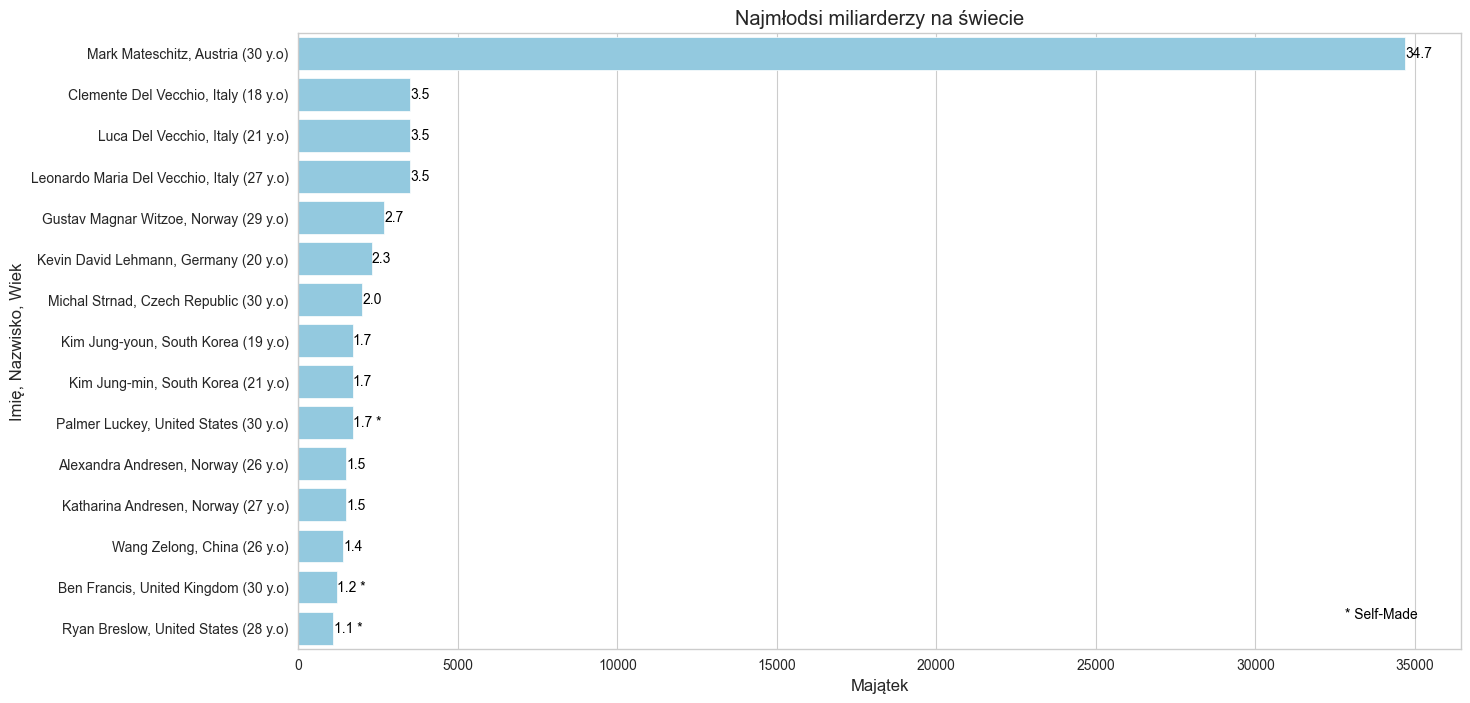

In [46]:
top_youngest=df[df['age']<=30].copy()
top_youngest=top_youngest.sort_values(by=['age']).sort_values(by=['finalWorth'],ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='finalWorth', 
            y=top_youngest['personName'] + ', ' + top_youngest['countryOfCitizenship'] + ' (' + top_youngest['age'].astype(int).astype(str) + ' y.o)', 
            data=top_youngest,color='skyblue',
           )

for i, v in enumerate(top_youngest['finalWorth']):
    if top_youngest.iloc[i]['selfMade']:
        plt.text(v+5, i, f'{v/1000:.1f}' + ' *', color='black', va='center')
    else:
        plt.text(v+5, i, f'{v/1000:.1f}', color='black', va='center')

plt.xlabel('Majątek')
plt.title('Najmłodsi miliarderzy na świecie')
plt.ylabel("Imię, Nazwisko, Wiek")
plt.annotate('* Self-Made', xy=(0.9, 0.05), xycoords='axes fraction', fontsize=10, color='black')
plt.show()